**Name:** David Andrejsin  
**Course:** Advanced Big Data and Data Mining (MSCS-634-M40)  
**Assignment:** Lab 1: Data Visualization, Data Preprocessing, and Statistical Analysis Using Python in Jupyter Notebook

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore.csv


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')


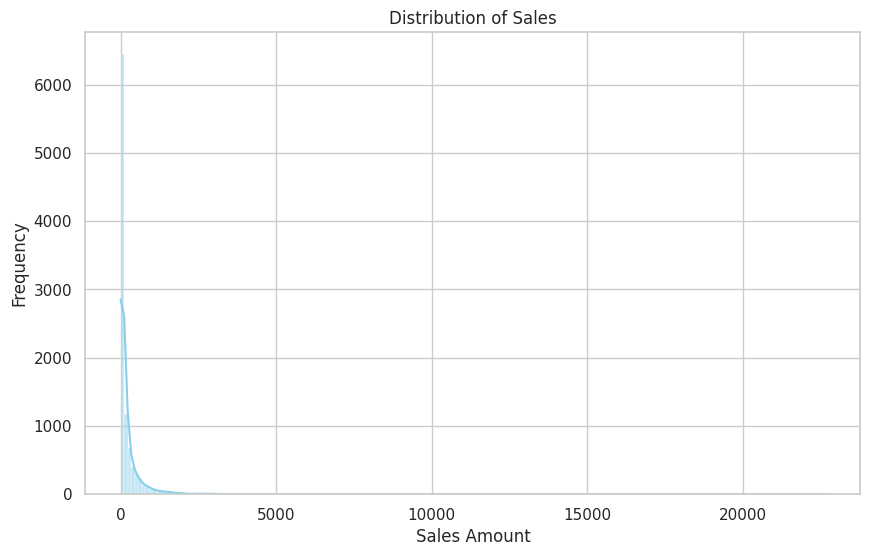

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df['Sales'], bins=200, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()


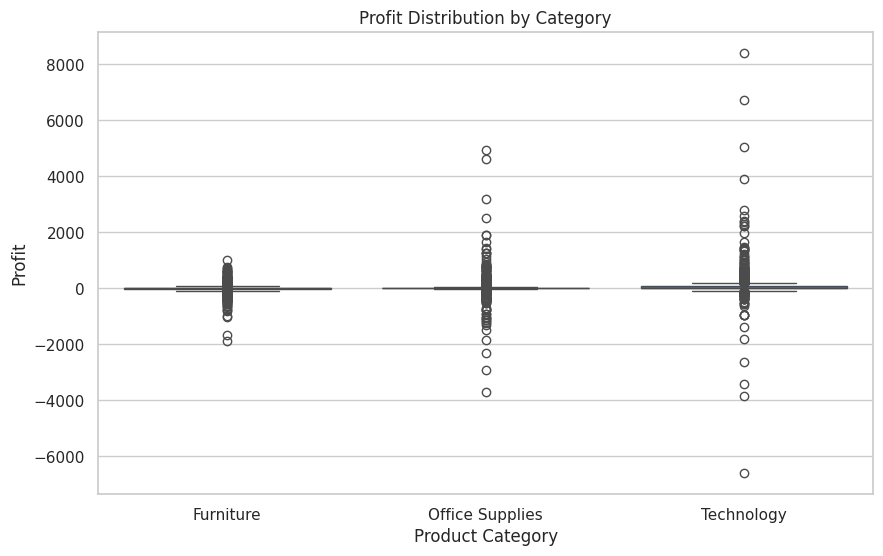

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Profit Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.show()


In [8]:
# Check for missing values
df.isnull().sum()


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [9]:
# Calculate Q1, Q3, and IQR
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
print("Q1:", Q1, "Q3:", Q3, "IQR:", IQR)

# Define outlier bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print("Lower Bound:", lower, "Upper Bound:", upper)

# Identify outliers
outliers = df[(df['Sales'] < lower) | (df['Sales'] > upper)]
print("Number of Outliers:", len(outliers))

# Before removal
print("Before removal:", df.shape)

# Remove outliers
df_no_outliers = df[(df['Sales'] >= lower) & (df['Sales'] <= upper)]

# After removal
print("After removal:", df_no_outliers.shape)


Q1: 17.28 Q3: 209.94 IQR: 192.66
Lower Bound: -271.71000000000004 Upper Bound: 498.93
Number of Outliers: 1167
Before removal: (9994, 21)
After removal: (8827, 21)


In [10]:
# Create a 30% sample of the cleaned (outliers removed) dataset
df_sampled = df_no_outliers.sample(frac=0.3, random_state=42)

print("Original shape:", df_no_outliers.shape)
print("Sampled shape (30%):", df_sampled.shape)

# Drop irrelevant columns
columns_to_drop = ['Postal Code', 'Row ID', 'Order ID', 'Customer ID',
                   'Product ID', 'Product Name', 'Ship Date', 'Ship Mode']

# Only drop columns that actually exist in the sampled DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df_sampled.columns]

df_reduced = df_sampled.drop(columns=columns_to_drop)

print("Columns before drop:", df_sampled.columns.tolist())
print("Columns after drop:", df_reduced.columns.tolist())


Original shape: (8827, 21)
Sampled shape (30%): (2648, 21)
Columns before drop: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
Columns after drop: ['Order Date', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit']


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_reduced['Sales_Scaled'] = scaler.fit_transform(df_reduced[['Sales']])
df_reduced['Profit_Scaled'] = scaler.fit_transform(df_reduced[['Profit']])

df_reduced[['Sales', 'Sales_Scaled', 'Profit', 'Profit_Scaled']].head()


,Sales,Sales_Scaled,Profit,Profit_Scaled
1152,3.640,0.006205,1.6380,0.710301
9016,11.416,0.021849,3.8529,0.713240
6910,115.960,0.232176,25.5112,0.741975
7043,198.744,0.398725,-14.1960,0.689294
7512,239.456,0.480632,17.9592,0.731956


In [12]:
df_reduced['Sales_Bin'] = pd.cut(df_reduced['Sales'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

df_reduced[['Sales', 'Sales_Bin']].head(10)


,Sales,Sales_Bin
1152,3.640,Low
9016,11.416,Low
6910,115.960,Low
7043,198.744,Medium
7512,239.456,Medium
1474,17.280,Low
3225,12.768,Low
1065,1.448,Low
3885,12.128,Low
6957,51.750,Low


In [13]:
# General structure and non-null count
print("DataFrame Info:")
df_reduced.info()

# Descriptive statistics for numeric columns
print("\nDescriptive Statistics:")
df_reduced.describe()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2648 entries, 1152 to 5997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Order Date     2648 non-null   object  
 1   Customer Name  2648 non-null   object  
 2   Segment        2648 non-null   object  
 3   Country        2648 non-null   object  
 4   City           2648 non-null   object  
 5   State          2648 non-null   object  
 6   Region         2648 non-null   object  
 7   Category       2648 non-null   object  
 8   Sub-Category   2648 non-null   object  
 9   Sales          2648 non-null   float64 
 10  Quantity       2648 non-null   int64   
 11  Discount       2648 non-null   float64 
 12  Profit         2648 non-null   float64 
 13  Sales_Scaled   2648 non-null   float64 
 14  Profit_Scaled  2648 non-null   float64 
 15  Sales_Bin      2648 non-null   category
dtypes: category(1), float64(5), int64(1), object(9)
memory usage: 33

,Sales,Quantity,Discount,Profit,Sales_Scaled,Profit_Scaled
count,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000
mean,92.802466,3.608384,0.160438,11.484163,0.185586,0.723365
std,113.627832,2.102843,0.210206,42.082298,0.228603,0.055833
min,0.556000,1.000000,0.000000,-533.732500,0.000000,0.000000
25%,15.059000,2.000000,0.000000,1.568600,0.029178,0.710209
50%,40.176000,3.000000,0.200000,7.264000,0.079710,0.717766
75%,124.126500,5.000000,0.200000,20.585000,0.248606,0.735439
max,497.610000,14.000000,0.800000,219.990400,1.000000,1.000000


In [14]:
print("Central Tendency Measures:\n")

# For 'Sales'
print("Sales:")
print("Min:", df_reduced['Sales'].min())
print("Max:", df_reduced['Sales'].max())
print("Mean:", df_reduced['Sales'].mean())
print("Median:", df_reduced['Sales'].median())
print("Mode:", df_reduced['Sales'].mode()[0])  # Returns a Series

print("\nProfit:")
print("Min:", df_reduced['Profit'].min())
print("Max:", df_reduced['Profit'].max())
print("Mean:", df_reduced['Profit'].mean())
print("Median:", df_reduced['Profit'].median())
print("Mode:", df_reduced['Profit'].mode()[0])


Central Tendency Measures:

Sales:
Min: 0.556
Max: 497.61
Mean: 92.80246559667674
Median: 40.176
Mode: 25.92

Profit:
Min: -533.7325
Max: 219.9904
Mean: 11.484162764350454
Median: 7.264
Mode: 0.0


In [15]:
print("Dispersion Measures:\n")

# For 'Sales'
sales_range = df_reduced['Sales'].max() - df_reduced['Sales'].min()
sales_Q1 = df_reduced['Sales'].quantile(0.25)
sales_Q3 = df_reduced['Sales'].quantile(0.75)
sales_IQR = sales_Q3 - sales_Q1

print("Sales:")
print("Range:", sales_range)
print("Q1:", sales_Q1)
print("Q3:", sales_Q3)
print("IQR:", sales_IQR)
print("Variance:", df_reduced['Sales'].var())
print("Standard Deviation:", df_reduced['Sales'].std())

# For 'Profit'
profit_range = df_reduced['Profit'].max() - df_reduced['Profit'].min()
profit_Q1 = df_reduced['Profit'].quantile(0.25)
profit_Q3 = df_reduced['Profit'].quantile(0.75)
profit_IQR = profit_Q3 - profit_Q1

print("\nProfit:")
print("Range:", profit_range)
print("Q1:", profit_Q1)
print("Q3:", profit_Q3)
print("IQR:", profit_IQR)
print("Variance:", df_reduced['Profit'].var())
print("Standard Deviation:", df_reduced['Profit'].std())


Dispersion Measures:

Sales:
Range: 497.05400000000003
Q1: 15.059
Q3: 124.1265
IQR: 109.0675
Variance: 12911.28413602498
Standard Deviation: 113.62783169639813

Profit:
Range: 753.7229
Q1: 1.5686
Q3: 20.585
IQR: 19.0164
Variance: 1770.9197843175245
Standard Deviation: 42.08229775472728


In [16]:
print("Correlation Matrix:\n")
print(df_reduced.corr(numeric_only=True))


Correlation Matrix:

                  Sales  Quantity  Discount    Profit  Sales_Scaled  \
Sales          1.000000  0.151915 -0.076969  0.240818      1.000000   
Quantity       0.151915  1.000000  0.013576  0.098773      0.151915   
Discount      -0.076969  0.013576  1.000000 -0.447353     -0.076969   
Profit         0.240818  0.098773 -0.447353  1.000000      0.240818   
Sales_Scaled   1.000000  0.151915 -0.076969  0.240818      1.000000   
Profit_Scaled  0.240818  0.098773 -0.447353  1.000000      0.240818   

               Profit_Scaled  
Sales               0.240818  
Quantity            0.098773  
Discount           -0.447353  
Profit              1.000000  
Sales_Scaled        0.240818  
Profit_Scaled       1.000000  
